In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'mathtext.default':  'regular' })
from matplotlib.ticker import MultipleLocator
import json
import pandas as pd
from pathlib import Path

In [2]:
embodied_carbon = 26356.568
device_life_years = 5
embodied_carbon_per_sec=embodied_carbon / device_life_years / 365 / 24 / 3600


# per video carbon

In [3]:
resolution = (240, 426)
num_frames = 16
num_steps = np.arange(20, 141, 20)
per_video_carbon = []
for num_step in num_steps:
    with open(f"../data/char_sample_1/quality/batch_1_steps_{num_step}_frames_{num_frames}_reso_{resolution[0]}x{resolution[1]}.json") as f:
        data = json.load(f)
    per_video_carbon.append(np.mean(data["co2"])  * 1.2 + embodied_carbon_per_sec * np.mean(data["time"]))
per_video_carbon = [k/per_video_carbon[0] for k in per_video_carbon]
per_video_carbon

[1.0,
 2.0295816248974456,
 2.9809558726594805,
 4.053060020241995,
 4.976255843103392,
 6.075696908146377,
 6.966995318792315]

# quality vs denoising steps

In [4]:
cases = {"imaging": "imaging_quality",
         "overall": "overall_consistency"}
quality = {}
for case, key in cases.items():
    qualities = []
    for num_step in num_steps:
        with open(f"/work/li.baol/GIT/vbench_customize/{num_step}_{case}.json") as f:
            data = json.load(f)
        qualities.append(data[key][0])
    quality[case] = [k/qualities[0] for k in qualities]
quality

{'imaging': [1.0,
  1.0406693283797945,
  1.0622938960862551,
  1.0583406835295788,
  1.0562991257086034,
  1.0525677566971174,
  1.056097885111545],
 'overall': [1.0,
  1.0465091126807462,
  1.0220723692598386,
  1.0424150617508516,
  1.0634603203338995,
  1.070839646393434,
  1.0898825311423743]}

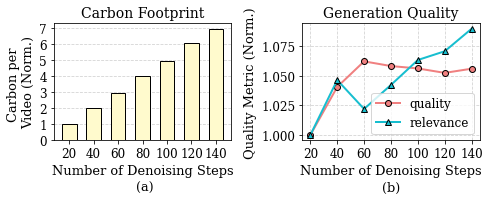

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.4, 'wspace': 0.4, 'bottom': 0.25, 
                    'top': 0.9, 'right':0.995, 'left':0.15}, figsize=(7,2.5))
width = 0.6
num_steps_str = [str(k) for k in num_steps]
colors = ["lightcoral", "tab:cyan"]

TITLES = ["Carbon Footprint", "Generation Quality"]
for i, ax in enumerate(axs):
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_title(TITLES[i], fontsize=14)
    ax.set_xlabel("Number of Denoising Steps", fontsize=13)

axs[0].bar(num_steps_str, per_video_carbon, width, color="lemonchiffon", edgecolor="black", zorder=3)
axs[0].set_ylabel("Carbon per \nVideo (Norm.)", fontsize=13)
axs[0].grid(which='both', axis='y', color='lightgrey', ls='dashed', zorder=0)
axs[0].yaxis.set_major_locator(MultipleLocator(1))

metric_names = ["quality", "relevance"]
markers = ["o", "^"]
for i, (key, val) in enumerate(quality.items()):
    axs[1].plot(num_steps, val, label=metric_names[i], zorder=3, linewidth=2, 
                marker=markers[i], markeredgecolor="black", color=colors[i])
axs[1].grid(which='both', axis='both', color='lightgrey', ls='dashed', zorder=0)
axs[1].xaxis.set_major_locator(MultipleLocator(20))
axs[1].legend(fontsize=12)
axs[1].set_ylabel("Quality Metric (Norm.)", fontsize=13)

fig.text(0.33, -0.03, "(a)", ha='center', fontsize=13)
fig.text(0.82, -0.03, "(b)", ha='center', fontsize=13)

plt.savefig(f"figures/fig5_steps_vs_quality.pdf", bbox_inches='tight')
    